In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2

## Sample Image Data 

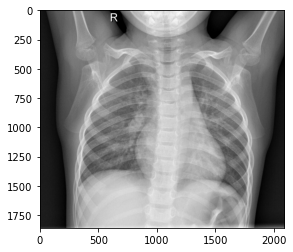

In [2]:
DATADIR="C:/Users/Shefin/Desktop/ChestX_ray"
p="train"
CATEGORIES=["NORMAL","PNEUMONIA"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,p,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap="gray")
        plt.show()
        break
    break

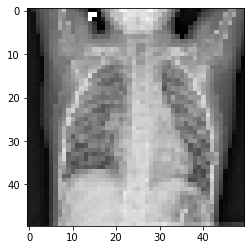

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

## Function To Generate Training Image Data 

In [4]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,p,category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
X = []
y = []
for feature , label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)
y = np.array(y)
X = X/255.0

## CNN Architecture

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

## Training The Model With Early Stopping To Prevent Overfitting 

In [7]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)
model.fit(X,y,validation_split =0.3,
        callbacks=[monitor],verbose=2,epochs=100)

Train on 3651 samples, validate on 1565 samples
Epoch 1/100
3651/3651 - 27s - loss: 0.3873 - accuracy: 0.8198 - val_loss: 0.0473 - val_accuracy: 0.9853
Epoch 2/100
3651/3651 - 26s - loss: 0.1861 - accuracy: 0.9326 - val_loss: 0.1463 - val_accuracy: 0.9470
Epoch 3/100
3651/3651 - 26s - loss: 0.1467 - accuracy: 0.9447 - val_loss: 0.0649 - val_accuracy: 0.9725
Epoch 4/100
3651/3651 - 26s - loss: 0.1323 - accuracy: 0.9545 - val_loss: 0.1392 - val_accuracy: 0.9431
Epoch 5/100
3651/3651 - 26s - loss: 0.1128 - accuracy: 0.9611 - val_loss: 0.0600 - val_accuracy: 0.9751
Epoch 6/100
3651/3651 - 25s - loss: 0.1055 - accuracy: 0.9630 - val_loss: 0.0627 - val_accuracy: 0.9712
Epoch 7/100
3651/3651 - 26s - loss: 0.0884 - accuracy: 0.9699 - val_loss: 0.0600 - val_accuracy: 0.9744
Epoch 8/100
3651/3651 - 25s - loss: 0.0951 - accuracy: 0.9671 - val_loss: 0.0694 - val_accuracy: 0.9744
Epoch 9/100
3651/3651 - 25s - loss: 0.0879 - accuracy: 0.9682 - val_loss: 0.1191 - val_accuracy: 0.9463
Epoch 10/100
365

## Saving The Model 

In [8]:
save_path = "."
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

## Evaluating the Model 

In [9]:
testing_data = []
s_path = "test"
def create_testing_data():
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,s_path,category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array , class_num])
            except Exception as e:
                pass
create_testing_data()
X_test = []
y_test = []
for feature , label in training_data:
    X_test.append(feature)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)
y_test = np.array(y_test)
X = X/255.0

In [11]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

5216/5216 - 9s - loss: 7.8283 - accuracy: 0.9872
0.9871549


## Taking User Input 

In [ ]:
path=input("Enter the image path: ")
for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass